# Model Training 

In [2]:
# import packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Modelling packages
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
# new packages


In [5]:
# Load the dataset
dataset = pd.read_csv("data/StudentsPerformance.csv")

In [6]:
# Check the dataset 
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
# Check the names of the features in the dataset
dataset.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
# Renaming few of the columns
dataset.rename({'race/ethnicity': 'race', 'parental level of education' : "parental",
       'test preparation course' : "preparation", 'math score' : 'math_score', 'reading score' : 'reading_score',
       'writing score' : 'writing_score'}, axis = 1, inplace = True)
dataset.columns

Index(['gender', 'race', 'parental', 'lunch', 'preparation', 'math_score',
       'reading_score', 'writing_score'],
      dtype='object')

In [113]:
for i in dataset.select_dtypes(include = "object").columns:
    print(i.upper()," :- ", dataset[i].nunique())
    print(dataset[i].unique(),"\n")

GENDER  :-  2
['female' 'male'] 

RACE  :-  5
['group B' 'group C' 'group A' 'group D' 'group E'] 

PARENTAL  :-  6
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

LUNCH  :-  2
['standard' 'free/reduced'] 

PREPARATION  :-  2
['none' 'completed'] 



In [10]:
# Separating dependent and independent features
X = dataset.drop(columns = "math_score", axis = 1)
Y = dataset["math_score"]

In [11]:
# check dependent and independent features 
print(X.head())
print(Y.head())

   gender     race            parental         lunch preparation  \
0  female  group B   bachelor's degree      standard        none   
1  female  group C        some college      standard   completed   
2  female  group B     master's degree      standard        none   
3    male  group A  associate's degree  free/reduced        none   
4    male  group C        some college      standard        none   

   reading_score  writing_score  
0             72             74  
1             90             88  
2             95             93  
3             57             44  
4             78             75  
0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64


In [12]:
# Check no. of categories and categories name in categorical features
for i in dataset.select_dtypes(include = "object").columns:
    print(i.upper(), " :- ", dataset[i].nunique())
    print(dataset[i].unique(), "\n")

GENDER  :-  2
['female' 'male'] 

RACE  :-  5
['group B' 'group C' 'group A' 'group D' 'group E'] 

PARENTAL  :-  6
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

LUNCH  :-  2
['standard' 'free/reduced'] 

PREPARATION  :-  2
['none' 'completed'] 



In [14]:
# Create column transformer with 3 types of transformer 

dataset_num = list(X.select_dtypes(exclude = "object").columns)
dataset_cat = list(X.select_dtypes(include = "object").columns)


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, dataset_cat),
        ("StandardScaler", numeric_transformer, dataset_num)
    ]
)
 

In [15]:
# Fit and transform the independent features 
X = preprocessor.fit_transform(X)

In [16]:
X.shape

(1000, 19)

In [17]:
# Splitting the data into train and test split 
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(Y_train.shape)

(800, 19)
(800,)


### Create an Evaluation Function to give all metrics after the model training  

In [18]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true,predicted),
    mse = mean_squared_error(true,predicted),
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true, predicted)
    
    return mae,mse,rmse,r2_square

### Create object for ML models 

In [19]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoosting Regressor" : CatBoostRegressor(verbose = False),
    "AdaBoost Regressor" : AdaBoostRegressor(),
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train)  # Train model
    
    # Make predictions 
    y_train_predicts = model.predict(X_train)
    y_test_predicts = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(Y_train, y_train_predicts)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(Y_test, y_test_predicts)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print("="*35)
    print("\n")

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3243
- Mean Absolute Error: (4.267109375,)
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: (4.2158203125,)
- R2 Score: 0.8803


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: (5.206302661246526,)
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: (5.157881810347763,)
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: (4.264987823725981,)
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: (4.2111006880142625,)
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.707

In [20]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ["Model Name", "R2 Score"]).sort_values(by = ["R2 Score"], ascending = False)

,Model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880345
5,Random Forest Regressor,0.855423
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.843988
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.735184


### Linear Regression 

In [21]:
lin_model = LinearRegression(fit_intercept = True)
lin_model = lin_model.fit(X_train, Y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, y_pred)
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 0.88


###  Plot y_pred and y_test

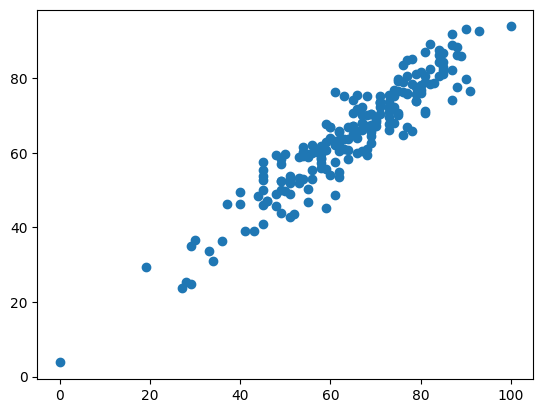

In [22]:
plt.scatter(Y_test, y_pred)
plt.show()

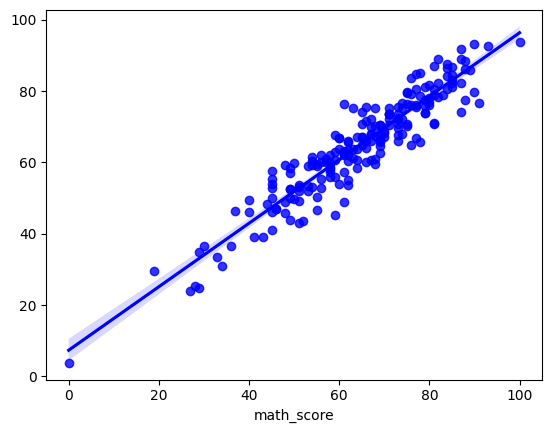

In [24]:
sns.regplot(x = Y_test, y=y_pred, ci = 95, color = "blue")
plt.show()

###  Difference between Actual and predicted value 

In [25]:
pred_df = pd.DataFrame({"Actual Values":Y_test, "Predicted Values":y_pred, "Difference Between":Y_test - y_pred})
pred_df

,Actual Values,Predicted Values,Difference Between
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
